# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je do 18. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 24. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

#### Z časových důvodů jsem u některých modelů zkusil jen 2 epochy a když se nic nezměnilo (nebo jen velmi málo), tak jsem víc nezkoušel. Není to ideální, ale bohužel deadline tlačí

To bohužel mimo jiné znamená, že výstupní grafy nemají u těchto modelů moc vypovídající hodnotu. Dále jsem také trochu přecenil výkon svého počítače a potřeboval bych asi další 2 dny na to, abych mohl celý notebook spustit znovu. Proto je u některých modelů možná (někde jsem to přepisoval zpátky, jen nevím jestli všude) nastaven jiný maximální počet epoch / po kolika epochách beze změny se má trénování zastavit, než kolik je vidět na výstupu buňky. Když jsem na výsledek koukl, zjistil, že model nikam nepovede, tak jsem počty snížil, ale jelikož buňku nebudu nakonec spouštět znovu, tak se to neprojeví. 

#### Imports/defines

In [12]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import torch
from torch import nn
import torch.nn.functional as F

from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix

model_path = "saves/best_model.pt"
best_model_path = "saves/overall_best_model.pt"

import matplotlib.pyplot as plt
%matplotlib inline
global best_model_loss
best_model_loss = 10000000.

#### Prvním nahlédnutí na data 

jelikož je dataset prakticky stejný jako pro první úkol, budu se lehce opakovat

In [13]:
df = pd.read_csv("train.csv")
display(df.head())
print(f"null entries: {df.isnull().sum().any()}\n")
display(df.info())
display(df.describe())
print(f"minimum value is: {df.min().min()}")
print(f"maximum value is: {df.max().max()}")


,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
1,4,4,4,4,4,4,5,5,5,6,...,4,4,4,4,4,4,4,4,4,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


null entries: False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 437.9 MB


None

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.00000,56000.000000,56000.000000,56000.000000
mean,0.873482,0.873482,0.873482,0.873482,0.873500,0.873500,0.873536,0.873679,0.877179,0.883036,...,0.899732,0.897536,0.888554,0.878393,0.874071,0.873589,0.87350,0.873482,0.873482,4.494393
std,1.493611,1.493611,1.493611,1.493611,1.493642,1.493642,1.493681,1.493741,1.557755,1.763484,...,2.041735,2.039311,1.995824,1.587205,1.494407,1.493691,1.49369,1.493611,1.493611,2.872563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,7.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,80.000000,168.000000,...,141.000000,168.000000,210.000000,107.000000,11.000000,11.000000,11.00000,11.000000,11.000000,9.000000


minimum value is: 0
maximum value is: 255


Zde můžeme rovnou vidět, že některé pixely budou důležitější než jiné. Například ty na kraji mají průměrnou hodnotu blízkou nule nebo na a jejich maximum je jedna. To značí, že tam je černo a tudíž jsme mimo oblečení. Pixely uprostřed budou mít průměrnou hodnotu mnohem vyšší a maximum bude dosahovat až na 255 (bílá) a tudíž budou v modelu hrát větší roli.

In [14]:
things = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
          4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(f"unique labels: {sorted(df['label'].unique())}\n")
for i in things:
    print(f"{things[i]}  {df[df['label'] == i].shape[0]}")


unique labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

T-shirt/top  5627
Trouser  5562
Pullover  5645
Dress  5628
Coat  5605
Sandal  5618
Shirt  5570
Sneaker  5557
Bag  5571
Ankle boot  5617


Vidíme že:
* v datasetu nejsou žádné null hodnoty
* dataset obsahuje 1024 sloupců, což odpovídá všem 32*32 pixelům, kde každý odpovídá hodnotě 0-255 (černá-bílá), a jeden sloupec pro label
* dataset obsahuje 10 druhů oblečení, které jsou zastoupeny +- stejným dílem

#### Zobrazení obrázků z trénovací množiny

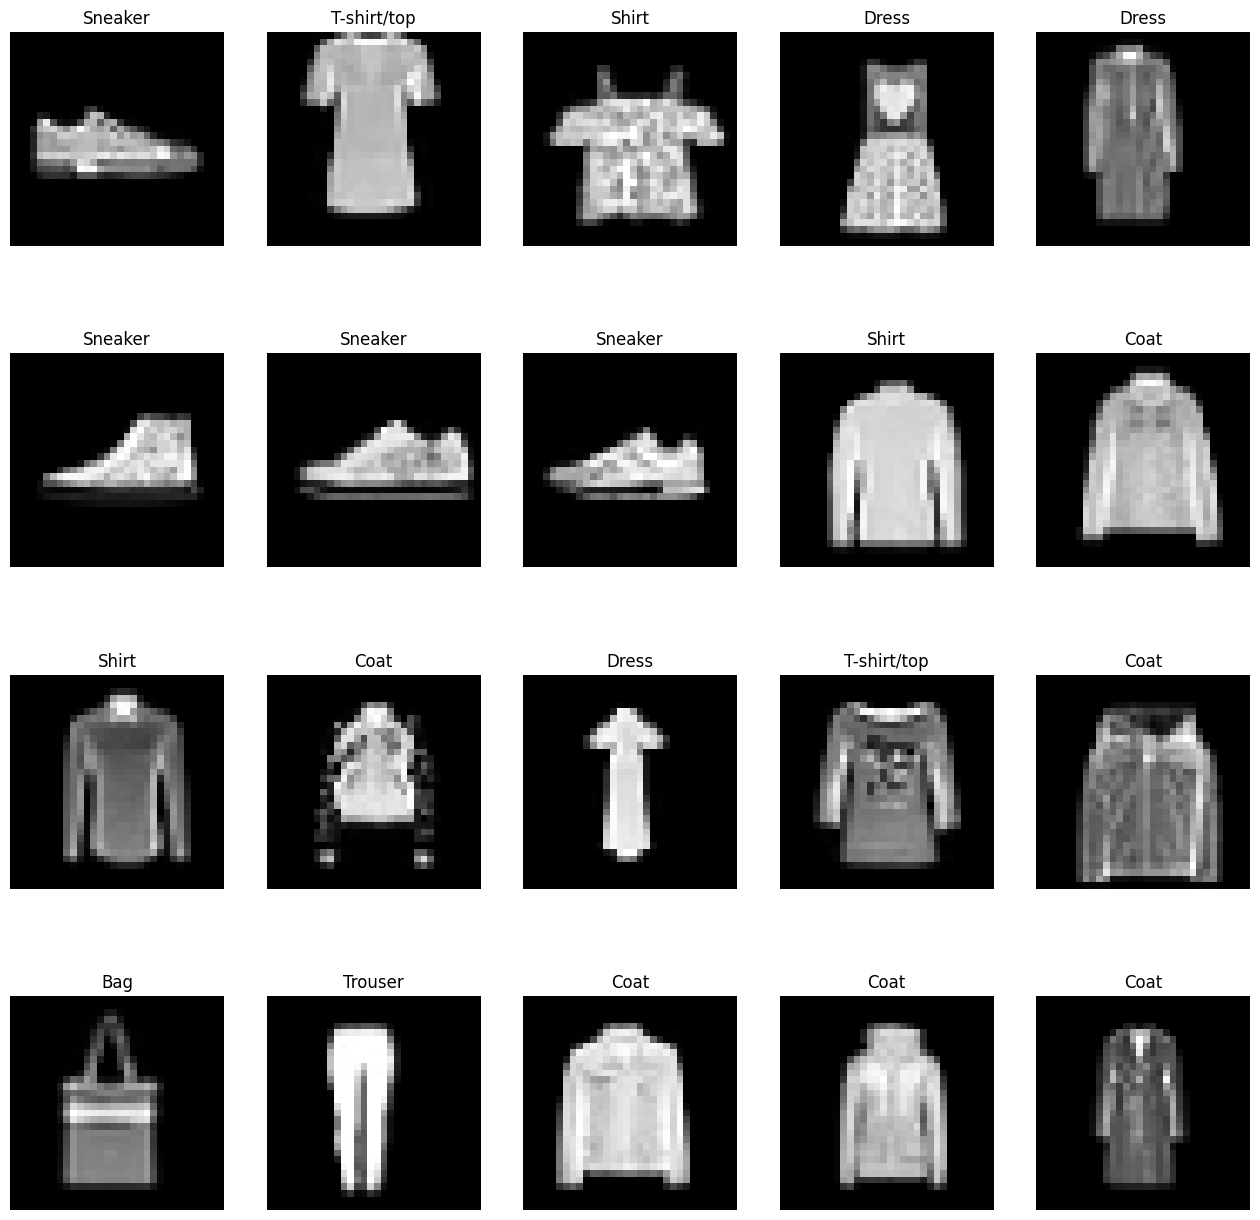

In [122]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 16))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(df.iloc[i][:-1].values.reshape((32, 32)), cmap='gray')
    ax.axis('off')
    ax.set_title(things[df.iloc[i][-1]])


Vidíme, že se opravdu jedná o "oblečení" (dejme tomu). Na všech obrázcích je minimálně čtvrtina pixelů, které jsou jen pozadí (konzistentně) a přináší tak minimální informaci o tom, jaké "oblečení" je na obrázku. V Rozích např nebude nikdy nic vidět. V datasetu jsou také chybné labels, jelikož obrázek (2,1) má být Ankle boot a ne sneaker.

#### Předělání datasetu na tensory

Nejdříve z dataframu vytvořím numpy arrays, které následně převedu na Tensor data. Ty následně rozdělím na jednotlivé mnnožiny.
Změním rozměry pole s obrázkovými daty na standardní formát [N,C,H,W]

In [15]:
source_images = df.drop("label", axis=1).to_numpy(dtype=float)
source_labels = df["label"].to_numpy()
source_images = source_images.reshape(-1,1, 32,32)
print(source_images.shape, source_labels.shape)


(56000, 1, 32, 32) (56000,)


In [16]:
dataset = torch.utils.data.TensorDataset(torch.tensor(source_images, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))

print(f"Počet prvků datasetu: {len(dataset)}")

Počet prvků datasetu: 56000


In [125]:
for i in range(2):
    display(dataset[i])

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor(7))

(tensor([[[4., 4., 4.,  ..., 4., 4., 4.],
          [4., 4., 4.,  ..., 4., 4., 4.],
          [4., 4., 4.,  ..., 4., 4., 4.],
          ...,
          [4., 4., 4.,  ..., 4., 4., 4.],
          [4., 4., 4.,  ..., 4., 4., 4.],
          [4., 4., 4.,  ..., 4., 4., 4.]]]),
 tensor(0))

#### Rozdělení datasetu na trénovací, validační a testovací množinu

In [19]:
rd_seed = 666
generator1 = torch.Generator().manual_seed(rd_seed)
trainData, valData, testData = torch.utils.data.random_split(dataset, [0.7, 0.2, 0.1], generator1)
print("The length of train data is:", len(trainData))
print("The length of val data is:", len(valData))
print("The length of test data is:", len(testData))

The length of train data is: 39200
The length of val data is: 11200
The length of test data is: 5600


In [20]:
training_loader = torch.utils.data.DataLoader(trainData, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(valData, batch_size=128, shuffle=False)

In [21]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 32, 32])
torch.Size([32])


## Model dopředné neuronové sítě
* Dopředná neuronová síť není špatná volba, ale není to druh který by byl na obrázky nejvhodnější, jelikož nebere v potaz dimenzi obrázku. Mohou mít problém se šumem v obrázku a obecně vůbec neřeší, že pixely jsou v nějaké vzájemné poloze

Plně parametrizovatelná síť

In [130]:
class MyNet(nn.Module):
    def __init__(self, num_layers=2, neurons=[16], activation_funcs=None, layer_funcs=None):
        super().__init__()
        self.num_layers = num_layers
        self.neurons = neurons
        self.hidden_layers = nn.ModuleList()
        self.activation_funcs = activation_funcs if activation_funcs else [nn.ReLU() for _ in range(num_layers-1)]
        layer_funcs = layer_funcs if layer_funcs else [nn.Linear(neurons[i], neurons[i+1]) for i in range(num_layers-2)]

        self.input_layer = nn.Linear(32*32, neurons[0])
        
        for i in range(num_layers - 2):
            self.hidden_layers.append(layer_funcs[i])

        self.output_layer = nn.Linear(neurons[num_layers-2], 10)

    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = self.activation_funcs[0](self.input_layer(x))

        for i, layer in enumerate(self.hidden_layers):
            x = self.activation_funcs[i+1](layer(x))

        x = self.output_layer(x)
        return x


Vypůjčený kód ze cvičení s přidaným trackováním train accuracy

In [22]:
def train_one_epoch(model, loss_fn, optimizer, training_loader):
    running_cum_loss = 0.
    correct = 0
    total = 0

    for data in tqdm(training_loader, total=len(training_loader)):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # train accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
            
    # Calculate accuracy
    accuracy = correct / total

    # Return the average loss and accuracy over the whole training set
    return running_cum_loss / len(training_loader.dataset), accuracy

Funkce pro zobrazování grafu z výsledků trénování

In [23]:
def makeGraphBoth(acc1, acc2, loss1, loss2):
    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(go.Scatter(
        x=list(range(1, len(loss1)+1)),
        y=loss1,
        mode='lines',
        name='Train Loss',
        line=dict(shape='spline')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=list(range(1, len(loss2)+1)),
        y=loss2,
        mode='lines',
        name='Validation Loss',
        line=dict(shape='spline')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=list(range(1, len(acc1)+1)),
        y=acc1,
        mode='lines',
        name='Train Accuracy',
        line=dict(shape='spline')
    ), row=1, col=2)

    fig.add_trace(go.Scatter(
        x=list(range(1, len(acc2)+1)),
        y=acc2,
        mode='lines',
        name='Validation Accuracy',
        line=dict(shape='spline')
    ), row=1, col=2)

    min_loss_idx = loss2.index(min(loss2))
    min_loss_epoch = min_loss_idx + 1
    min_loss_value = loss2[min_loss_idx]
    fig.add_trace(go.Scatter(
        x=[min_loss_epoch],
        y=[min_loss_value],
        mode='markers',
        name='Lowest Validation Loss',
        marker=dict(size=8, color='red')
    ), row=1, col=1)

    max_acc_idx = acc2.index(max(acc2))
    max_acc_epoch = max_acc_idx + 1
    max_acc_value = acc2[max_acc_idx]
    fig.add_trace(go.Scatter(
        x=[max_acc_epoch],
        y=[max_acc_value],
        mode='markers',
        name='Highest Validation Accuracy',
        marker=dict(size=8, color='green')
    ), row=1, col=2)


    fig.update_layout(
        title='Training and Validation Metrics',
        title_x=0.5,
        xaxis1_title='Epoch',
        yaxis1_title='Loss',
        xaxis2_title='Epoch',
        yaxis2_title='Accuracy',
        width=1200,
        annotations=[
            dict(
                text='Train Loss vs Validation Loss',
                xref='paper',
                yref='paper',
                x=0.1,
                y=1.1,
                showarrow=False,
                font=dict(size=14)
            ),
            dict(
                text='Train Accuracy vs Validation Accuracy',
                xref='paper',
                yref='paper',
                x=0.9,
                y=1.1,
                showarrow=False,
                font=dict(size=14)
            )
        ]
    )

    fig.show()


Opět poupravený kód ze cvičení

In [24]:
def train(model, loss_fn, optimizer, MAX_EPOCHS=15, K_EPOCHS=5, trainLoader=training_loader, valLoader=validation_loader):
    global best_model_loss
    trainLoss = []
    trainAcc = []
    valLoss = []
    valAcc = []
    best_vloss = 1000000.
    
    epochs_from_best = 0
    for epoch in range(MAX_EPOCHS):
        print('EPOCH {}:'.format(epoch + 1))

        model.train(True)

        # One training step
        avg_loss, epochAcc = train_one_epoch(
            model, loss_fn, optimizer, trainLoader)
        trainLoss.append(avg_loss)
        trainAcc.append(epochAcc)

        model.train(False)

        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for vdata in valLoader:
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuraccy
        avg_vloss = running_cum_vloss / len(valData)
        valLoss.append(avg_vloss)
        vacc = vcorrect / len(valData)
        valAcc.append(vacc)
        if avg_vloss < best_model_loss:
            best_model_loss = avg_vloss
            torch.save(model.state_dict(), best_model_path)
            print(f"{20*'-'}Overall best model so far{20*'-'}")

        print(
            f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")

        if avg_vloss < best_vloss:
            print("Saving best model")
            best_vloss = avg_vloss
            torch.save(model.state_dict(), model_path)
            epochs_from_best = 0
        else:
            print("No improvement in this epoch.")
            epochs_from_best += 1

        # EARLY STOPPING
        if epochs_from_best >= K_EPOCHS:
            print("Early stopping now")
            break
    makeGraphBoth(trainAcc, valAcc, trainLoss, valLoss)


Nejprve vyzkouším model s čísly jakoze cvičení

In [146]:
model = MyNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:02<00:00, 462.79it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 5.048, VALIDATION loss: 2.303, accuraccy: 0.095
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:02<00:00, 453.20it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.099
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:02<00:00, 433.17it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.099
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:02<00:00, 458.12it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.099
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:02<00:00, 462.09it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.100
No improvement in this epoch.


Jak můžeme vidět, přesnost tohoto modelu je po prvních 5 epochách dost tristní. Model by měl stejnou přesnost, kdyby predikoval náhodně (máme 10 možností pro label a accuracy je kolem 10 %). Z grafu je vidět, že sice se přesnost mezi epochami trochu mění, ale ne zrovna moc k lepšímu.

Nejprve zkusím měnit počet vrstev a neuronů.

Máme 1024 pixelů, tak zkusím nejdříve půlit

In [147]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
layers = 7
neurons = [512, 256, 128, 64, 32, 16]
model = MyNet(num_layers=layers, neurons=neurons)
loss_fn = torch.nn.CrossEntropyLoss()
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:07<00:00, 162.45it/s]


TRAIN loss: 2.333, VALIDATION loss: 2.332, accuraccy: 0.124
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:07<00:00, 163.88it/s]


TRAIN loss: 2.333, VALIDATION loss: 2.332, accuraccy: 0.124
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:08<00:00, 150.28it/s]


TRAIN loss: 2.333, VALIDATION loss: 2.332, accuraccy: 0.124
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:08<00:00, 152.41it/s]


TRAIN loss: 2.333, VALIDATION loss: 2.332, accuraccy: 0.124
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:08<00:00, 136.69it/s]


TRAIN loss: 2.333, VALIDATION loss: 2.332, accuraccy: 0.124
No improvement in this epoch.


Vidíme, že model se zasekl v nějakém lokálním extrému a odmítá se z něj hnout. Zkusím tedy ještě několik variant, než začnu měnit něco dalšího

In [148]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
layers = 7
neurons = [512, 256, 20, 200, 40, 20]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer,5)

EPOCH 1:


100%|██████████| 1225/1225 [00:07<00:00, 158.54it/s]


TRAIN loss: 2.410, VALIDATION loss: 2.412, accuraccy: 0.095
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 186.92it/s]


TRAIN loss: 2.410, VALIDATION loss: 2.412, accuraccy: 0.095
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:07<00:00, 170.04it/s]


TRAIN loss: 2.410, VALIDATION loss: 2.412, accuraccy: 0.095
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:06<00:00, 189.42it/s]


TRAIN loss: 2.410, VALIDATION loss: 2.412, accuraccy: 0.095
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:08<00:00, 143.54it/s]


TRAIN loss: 2.410, VALIDATION loss: 2.412, accuraccy: 0.095
No improvement in this epoch.


Model ve tvaru přesýpacích hodin také nepomohl, žkusím ještě pořádn trychtýř a pak změním počet vrstev

In [149]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
layers = 7
neurons = [512, 256, 100, 50, 25, 14]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:06<00:00, 175.18it/s]


TRAIN loss: 2.330, VALIDATION loss: 2.327, accuraccy: 0.072
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 180.78it/s]


TRAIN loss: 2.330, VALIDATION loss: 2.327, accuraccy: 0.072
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:07<00:00, 162.34it/s]


TRAIN loss: 2.330, VALIDATION loss: 2.327, accuraccy: 0.072
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:06<00:00, 177.59it/s]


TRAIN loss: 2.330, VALIDATION loss: 2.327, accuraccy: 0.072
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:06<00:00, 176.08it/s]


TRAIN loss: 2.330, VALIDATION loss: 2.327, accuraccy: 0.072
No improvement in this epoch.


In [150]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
layers = 4
neurons = [ 100, 50, 25, 14]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:03<00:00, 318.96it/s]


TRAIN loss: 5.121, VALIDATION loss: 5.077, accuraccy: 0.134
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:03<00:00, 356.42it/s]


TRAIN loss: 5.121, VALIDATION loss: 5.077, accuraccy: 0.134
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:03<00:00, 362.20it/s]


TRAIN loss: 5.121, VALIDATION loss: 5.077, accuraccy: 0.134
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:03<00:00, 365.88it/s]


TRAIN loss: 5.121, VALIDATION loss: 5.077, accuraccy: 0.134
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:03<00:00, 366.74it/s]


TRAIN loss: 5.121, VALIDATION loss: 5.077, accuraccy: 0.134
No improvement in this epoch.


Snížení počtu vrstev malinko pomohlo, ale model je pořád naprosto nepoužitelný a vypadá to, že s tímto přístupem lokální extrém neopustím. <br>
Jako poslední možnost u základního modelu zkusím místo Relu použít sigmoidu 

In [151]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
layers = 4
neurons = [ 100, 50, 25, 14]
actFunc = [nn.Sigmoid(),nn.Sigmoid(), nn.Sigmoid()]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:03<00:00, 347.25it/s]


TRAIN loss: 4.790, VALIDATION loss: 4.747, accuraccy: 0.114
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:03<00:00, 367.64it/s]


TRAIN loss: 4.790, VALIDATION loss: 4.747, accuraccy: 0.114
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:03<00:00, 354.23it/s]


TRAIN loss: 4.790, VALIDATION loss: 4.747, accuraccy: 0.114
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:03<00:00, 384.47it/s]


TRAIN loss: 4.790, VALIDATION loss: 4.747, accuraccy: 0.114
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:03<00:00, 392.53it/s]


TRAIN loss: 4.790, VALIDATION loss: 4.747, accuraccy: 0.114
No improvement in this epoch.


To výsledný model ještě zhoršilo. Zkusím obrázky podělit 255 (maximální možná hodnota) a dostat tak příznaky do intervalu [0, 1]

In [28]:
# tensor scaling
tensors1, tensors2 = dataset.tensors
divided_tensors = tensors1/255
scaled_dataset = torch.utils.data.TensorDataset(divided_tensors, tensors2)
display(scaled_dataset[0])
generator1 = torch.Generator().manual_seed(rd_seed)
scaledTrainData, scaledValData, scaledTestData = torch.utils.data.random_split(dataset, [0.7, 0.2, 0.1], generator1)
print("The length of scaled train data is:", len(scaledTrainData))
print("The length of scaled val data is:", len(scaledValData))
print("The length of scaled test data is:", len(scaledTestData))
scaled_training_loader = torch.utils.data.DataLoader(scaledTrainData, batch_size=32, shuffle=True)
scaled_validation_loader = torch.utils.data.DataLoader(scaledValData, batch_size=128, shuffle=False)

(tensor([[[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          ...,
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039]]]),
 tensor(7))

The length of scaled train data is: 39200
The length of scaled val data is: 11200
The length of scaled test data is: 5600


Zkusím tedy to samé pro podělená data

In [153]:
model = MyNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train(model, loss_fn, optimizer, 5, trainLoader=scaled_training_loader, valLoader=scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:03<00:00, 398.17it/s]


TRAIN loss: 84.435, VALIDATION loss: 2.304, accuraccy: 0.097
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:02<00:00, 456.20it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.103
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:02<00:00, 457.23it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.101
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:02<00:00, 459.51it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.099
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:02<00:00, 460.79it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.097
No improvement in this epoch.


U úplně základního modelu jsem si nepomohl. Zkusím teda opět pár jiných možností

In [154]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
layers = 7
neurons = [512, 256, 128, 64, 32, 16]
model = MyNet(num_layers=layers, neurons=neurons)
loss_fn = torch.nn.CrossEntropyLoss()
train(model, loss_fn, optimizer, 5, trainLoader=scaled_training_loader, valLoader=scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:06<00:00, 183.01it/s]


TRAIN loss: 2.362, VALIDATION loss: 2.360, accuraccy: 0.076
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 193.31it/s]


TRAIN loss: 2.362, VALIDATION loss: 2.360, accuraccy: 0.076
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:06<00:00, 194.99it/s]


TRAIN loss: 2.362, VALIDATION loss: 2.360, accuraccy: 0.076
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:06<00:00, 191.32it/s]


TRAIN loss: 2.362, VALIDATION loss: 2.360, accuraccy: 0.076
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:06<00:00, 193.01it/s]


TRAIN loss: 2.362, VALIDATION loss: 2.360, accuraccy: 0.076
No improvement in this epoch.


In [155]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
layers = 4
neurons = [ 100, 50, 25, 14]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5, trainLoader=scaled_training_loader, valLoader=scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:03<00:00, 333.59it/s]


TRAIN loss: 7.823, VALIDATION loss: 7.781, accuraccy: 0.106
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:03<00:00, 367.25it/s]


TRAIN loss: 7.823, VALIDATION loss: 7.781, accuraccy: 0.106
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:03<00:00, 355.97it/s]


TRAIN loss: 7.823, VALIDATION loss: 7.781, accuraccy: 0.106
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:05<00:00, 244.26it/s]


TRAIN loss: 7.823, VALIDATION loss: 7.781, accuraccy: 0.106
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:04<00:00, 284.25it/s]


TRAIN loss: 7.823, VALIDATION loss: 7.781, accuraccy: 0.106
No improvement in this epoch.


Jelikož jsem zaseklý pořád zaseklý v nějakém lokálním extrému, zkusím měnit parametry gradientního sestupu

In [156]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
layers = 3
neurons = [ 50, 25, 14]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5, trainLoader=scaled_training_loader, valLoader=scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:03<00:00, 341.38it/s]


TRAIN loss: 12.850, VALIDATION loss: 12.720, accuraccy: 0.114
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:02<00:00, 428.28it/s]


TRAIN loss: 12.850, VALIDATION loss: 12.720, accuraccy: 0.114
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:03<00:00, 329.98it/s]


TRAIN loss: 12.850, VALIDATION loss: 12.720, accuraccy: 0.114
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:05<00:00, 244.00it/s]


TRAIN loss: 12.850, VALIDATION loss: 12.720, accuraccy: 0.114
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:04<00:00, 305.65it/s]


TRAIN loss: 12.850, VALIDATION loss: 12.720, accuraccy: 0.114
No improvement in this epoch.


In [157]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
layers = 2
neurons = [ 30, 18]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5, trainLoader=scaled_training_loader, valLoader=scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:03<00:00, 334.78it/s]


TRAIN loss: 23.680, VALIDATION loss: 23.567, accuraccy: 0.076
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:03<00:00, 389.98it/s]


TRAIN loss: 23.680, VALIDATION loss: 23.567, accuraccy: 0.076
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:02<00:00, 411.97it/s]


TRAIN loss: 23.680, VALIDATION loss: 23.567, accuraccy: 0.076
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:03<00:00, 389.63it/s]


TRAIN loss: 23.680, VALIDATION loss: 23.567, accuraccy: 0.076
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:03<00:00, 393.29it/s]


TRAIN loss: 23.680, VALIDATION loss: 23.567, accuraccy: 0.076
No improvement in this epoch.


In [158]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
layers = 4
neurons = [ 100, 50, 25, 14]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5, trainLoader=scaled_training_loader, valLoader=scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:04<00:00, 300.39it/s]


TRAIN loss: 3.962, VALIDATION loss: 3.966, accuraccy: 0.116
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:03<00:00, 324.84it/s]


TRAIN loss: 3.962, VALIDATION loss: 3.966, accuraccy: 0.116
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:03<00:00, 340.76it/s]


TRAIN loss: 3.962, VALIDATION loss: 3.966, accuraccy: 0.116
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:04<00:00, 305.41it/s]


TRAIN loss: 3.962, VALIDATION loss: 3.966, accuraccy: 0.116
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:04<00:00, 292.77it/s]


TRAIN loss: 3.962, VALIDATION loss: 3.966, accuraccy: 0.116
No improvement in this epoch.


Jelikož se s gradientním sestupem nikam nedostávám, použiji teď Adam

In [159]:
model = MyNet()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:04<00:00, 250.53it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 2.214, VALIDATION loss: 1.878, accuraccy: 0.224
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:04<00:00, 245.85it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 1.811, VALIDATION loss: 1.745, accuraccy: 0.268
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:04<00:00, 287.60it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 1.740, VALIDATION loss: 1.690, accuraccy: 0.255
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:04<00:00, 281.09it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 1.683, VALIDATION loss: 1.665, accuraccy: 0.292
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [00:03<00:00, 306.64it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 1.607, VALIDATION loss: 1.573, accuraccy: 0.340
Saving best model


I jen s dvěma vrstvami se přesnost modelu velmi zlepšila. Zkusím si tedy opět pohrát s množstvím vrstev a neuronů

In [160]:
optimizer = torch.optim.Adam(model.parameters())
layers = 7
neurons = [512, 256, 128, 64, 32, 16]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:06<00:00, 182.91it/s]


TRAIN loss: 2.345, VALIDATION loss: 2.348, accuraccy: 0.090
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 194.95it/s]


TRAIN loss: 2.345, VALIDATION loss: 2.348, accuraccy: 0.090
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:06<00:00, 200.34it/s]


TRAIN loss: 2.345, VALIDATION loss: 2.348, accuraccy: 0.090
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:06<00:00, 202.20it/s]


TRAIN loss: 2.345, VALIDATION loss: 2.348, accuraccy: 0.090
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:06<00:00, 199.12it/s]


TRAIN loss: 2.345, VALIDATION loss: 2.348, accuraccy: 0.090
No improvement in this epoch.


In [161]:
optimizer = torch.optim.Adam(model.parameters())
layers = 7
neurons = [512, 256, 100, 200, 64, 20]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:07<00:00, 156.46it/s]


TRAIN loss: 2.312, VALIDATION loss: 2.312, accuraccy: 0.100
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:07<00:00, 169.45it/s]


TRAIN loss: 2.312, VALIDATION loss: 2.312, accuraccy: 0.100
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:07<00:00, 156.46it/s]


TRAIN loss: 2.312, VALIDATION loss: 2.312, accuraccy: 0.100
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:07<00:00, 163.59it/s]


TRAIN loss: 2.312, VALIDATION loss: 2.312, accuraccy: 0.100
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:07<00:00, 173.56it/s]


TRAIN loss: 2.312, VALIDATION loss: 2.312, accuraccy: 0.100
No improvement in this epoch.


In [162]:
optimizer = torch.optim.Adam(model.parameters())
layers = 7
neurons = [512, 256, 100, 30, 25, 14]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:07<00:00, 167.49it/s]


TRAIN loss: 2.346, VALIDATION loss: 2.346, accuraccy: 0.075
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:07<00:00, 173.53it/s]


TRAIN loss: 2.346, VALIDATION loss: 2.346, accuraccy: 0.075
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:06<00:00, 186.04it/s]


TRAIN loss: 2.346, VALIDATION loss: 2.346, accuraccy: 0.075
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:06<00:00, 202.53it/s]


TRAIN loss: 2.346, VALIDATION loss: 2.346, accuraccy: 0.075
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:06<00:00, 188.19it/s]


TRAIN loss: 2.346, VALIDATION loss: 2.346, accuraccy: 0.075
No improvement in this epoch.


In [163]:
optimizer = torch.optim.Adam(model.parameters())
layers = 7
neurons = [512, 256, 20, 200, 40, 20]
model = MyNet(num_layers=layers, neurons=neurons)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:07<00:00, 154.15it/s]


TRAIN loss: 2.328, VALIDATION loss: 2.328, accuraccy: 0.109
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:07<00:00, 169.91it/s]


TRAIN loss: 2.328, VALIDATION loss: 2.328, accuraccy: 0.109
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:07<00:00, 171.65it/s]


TRAIN loss: 2.328, VALIDATION loss: 2.328, accuraccy: 0.109
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:07<00:00, 161.20it/s]


TRAIN loss: 2.328, VALIDATION loss: 2.328, accuraccy: 0.109
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:07<00:00, 166.43it/s]


TRAIN loss: 2.328, VALIDATION loss: 2.328, accuraccy: 0.109
No improvement in this epoch.


Vypadá to, že 7 vrstev je moc, zkusím tedy počet zmenšit

In [164]:
layers = 4
neurons = [100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:05<00:00, 217.98it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.794, VALIDATION loss: 0.633, accuraccy: 0.761
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 189.54it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.605, VALIDATION loss: 0.624, accuraccy: 0.771
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:08<00:00, 148.69it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.556, VALIDATION loss: 0.583, accuraccy: 0.794
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:07<00:00, 155.61it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.521, VALIDATION loss: 0.554, accuraccy: 0.803
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [00:07<00:00, 166.62it/s]


TRAIN loss: 0.501, VALIDATION loss: 0.565, accuraccy: 0.796
No improvement in this epoch.


S menším počtem vrstev se model rapidě zlepšil

In [165]:
layers = 4
neurons = [256, 128, 64, 32]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer,5)

EPOCH 1:


100%|██████████| 1225/1225 [00:09<00:00, 128.59it/s]


TRAIN loss: 0.784, VALIDATION loss: 0.681, accuraccy: 0.754
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:12<00:00, 94.81it/s] 


TRAIN loss: 0.599, VALIDATION loss: 0.614, accuraccy: 0.778
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:13<00:00, 93.67it/s] 


--------------------Overall best model so far--------------------
TRAIN loss: 0.550, VALIDATION loss: 0.547, accuraccy: 0.802
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:12<00:00, 94.78it/s] 


TRAIN loss: 0.513, VALIDATION loss: 0.550, accuraccy: 0.802
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:13<00:00, 91.90it/s] 


TRAIN loss: 0.488, VALIDATION loss: 0.563, accuraccy: 0.794
No improvement in this epoch.


In [166]:
layers = 4
neurons = [256, 128, 30, 16]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:09<00:00, 127.91it/s]


TRAIN loss: 0.815, VALIDATION loss: 0.641, accuraccy: 0.762
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:11<00:00, 107.63it/s]


TRAIN loss: 0.593, VALIDATION loss: 0.597, accuraccy: 0.789
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:12<00:00, 99.03it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.536, VALIDATION loss: 0.534, accuraccy: 0.802
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:14<00:00, 84.38it/s] 


TRAIN loss: 0.513, VALIDATION loss: 0.564, accuraccy: 0.796
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:11<00:00, 104.33it/s]


TRAIN loss: 0.488, VALIDATION loss: 0.564, accuraccy: 0.795
No improvement in this epoch.


In [167]:
layers = 5
neurons = [512, 256, 128, 30, 16]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:14<00:00, 84.41it/s]


TRAIN loss: 0.791, VALIDATION loss: 0.620, accuraccy: 0.779
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:18<00:00, 67.03it/s]


TRAIN loss: 0.574, VALIDATION loss: 0.592, accuraccy: 0.788
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:19<00:00, 62.13it/s]


TRAIN loss: 0.521, VALIDATION loss: 0.541, accuraccy: 0.799
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:19<00:00, 62.56it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.492, VALIDATION loss: 0.491, accuraccy: 0.824
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [00:17<00:00, 69.50it/s]


TRAIN loss: 0.466, VALIDATION loss: 0.494, accuraccy: 0.825
No improvement in this epoch.


Vypadá to, že jsem se opět zasekl, zkusím tedy early stopping a trénovat více epoch

In [168]:
layers = 4
neurons = [100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 20, 3)

EPOCH 1:


100%|██████████| 1225/1225 [00:04<00:00, 255.10it/s]


TRAIN loss: 0.787, VALIDATION loss: 0.649, accuraccy: 0.766
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:05<00:00, 237.96it/s]


TRAIN loss: 0.609, VALIDATION loss: 0.627, accuraccy: 0.776
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:05<00:00, 234.99it/s]


TRAIN loss: 0.557, VALIDATION loss: 0.565, accuraccy: 0.797
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:05<00:00, 239.73it/s]


TRAIN loss: 0.527, VALIDATION loss: 0.571, accuraccy: 0.788
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:05<00:00, 238.47it/s]


TRAIN loss: 0.506, VALIDATION loss: 0.582, accuraccy: 0.796
No improvement in this epoch.
EPOCH 6:


100%|██████████| 1225/1225 [00:05<00:00, 237.50it/s]


TRAIN loss: 0.484, VALIDATION loss: 0.552, accuraccy: 0.808
Saving best model
EPOCH 7:


100%|██████████| 1225/1225 [00:05<00:00, 234.94it/s]


TRAIN loss: 0.468, VALIDATION loss: 0.534, accuraccy: 0.815
Saving best model
EPOCH 8:


100%|██████████| 1225/1225 [00:05<00:00, 227.19it/s]


TRAIN loss: 0.460, VALIDATION loss: 0.530, accuraccy: 0.815
Saving best model
EPOCH 9:


100%|██████████| 1225/1225 [00:05<00:00, 234.63it/s]


TRAIN loss: 0.441, VALIDATION loss: 0.509, accuraccy: 0.816
Saving best model
EPOCH 10:


100%|██████████| 1225/1225 [00:05<00:00, 230.52it/s]


TRAIN loss: 0.439, VALIDATION loss: 0.521, accuraccy: 0.815
No improvement in this epoch.
EPOCH 11:


100%|██████████| 1225/1225 [00:05<00:00, 228.76it/s]


TRAIN loss: 0.426, VALIDATION loss: 0.516, accuraccy: 0.819
No improvement in this epoch.
EPOCH 12:


100%|██████████| 1225/1225 [00:05<00:00, 220.44it/s]


TRAIN loss: 0.417, VALIDATION loss: 0.527, accuraccy: 0.824
No improvement in this epoch.
Early stopping now


In [169]:
layers = 5
neurons = [200, 100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 20, 4)

EPOCH 1:


100%|██████████| 1225/1225 [00:06<00:00, 192.43it/s]


TRAIN loss: 0.776, VALIDATION loss: 0.636, accuraccy: 0.764
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:07<00:00, 163.14it/s]


TRAIN loss: 0.579, VALIDATION loss: 0.591, accuraccy: 0.783
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:07<00:00, 160.11it/s]


TRAIN loss: 0.530, VALIDATION loss: 0.533, accuraccy: 0.804
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:07<00:00, 159.32it/s]


TRAIN loss: 0.501, VALIDATION loss: 0.543, accuraccy: 0.807
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:07<00:00, 157.25it/s]


TRAIN loss: 0.487, VALIDATION loss: 0.521, accuraccy: 0.813
Saving best model
EPOCH 6:


100%|██████████| 1225/1225 [00:07<00:00, 156.25it/s]


TRAIN loss: 0.464, VALIDATION loss: 0.503, accuraccy: 0.818
Saving best model
EPOCH 7:


100%|██████████| 1225/1225 [00:08<00:00, 152.72it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.446, VALIDATION loss: 0.485, accuraccy: 0.828
Saving best model
EPOCH 8:


100%|██████████| 1225/1225 [00:08<00:00, 153.01it/s]


TRAIN loss: 0.432, VALIDATION loss: 0.531, accuraccy: 0.808
No improvement in this epoch.
EPOCH 9:


100%|██████████| 1225/1225 [00:08<00:00, 152.80it/s]


TRAIN loss: 0.421, VALIDATION loss: 0.502, accuraccy: 0.825
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [00:08<00:00, 148.27it/s]


TRAIN loss: 0.409, VALIDATION loss: 0.533, accuraccy: 0.809
No improvement in this epoch.
EPOCH 11:


100%|██████████| 1225/1225 [00:07<00:00, 153.76it/s]


TRAIN loss: 0.397, VALIDATION loss: 0.499, accuraccy: 0.828
No improvement in this epoch.
Early stopping now


Zkusím ještě u algoritmu Adam měnit nějaké parametry, než se přesunu ke konvolučním sítím, které jsou na daný problém vhodnější

In [170]:
layers = 5
neurons = [200, 100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
train(model, loss_fn, optimizer, 5, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:07<00:00, 163.33it/s]


TRAIN loss: 0.972, VALIDATION loss: 0.776, accuraccy: 0.711
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:09<00:00, 123.50it/s]


TRAIN loss: 0.731, VALIDATION loss: 0.764, accuraccy: 0.721
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:09<00:00, 123.55it/s]


TRAIN loss: 0.710, VALIDATION loss: 0.712, accuraccy: 0.750
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:09<00:00, 124.75it/s]


TRAIN loss: 0.693, VALIDATION loss: 0.691, accuraccy: 0.760
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [00:09<00:00, 123.49it/s]


TRAIN loss: 0.668, VALIDATION loss: 0.681, accuraccy: 0.741
Saving best model


In [171]:
layers = 5
neurons = [200, 100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
train(model, loss_fn, optimizer, 5, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:07<00:00, 157.94it/s]


TRAIN loss: 1513.043, VALIDATION loss: 2.333, accuraccy: 0.099
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:11<00:00, 106.25it/s]


TRAIN loss: 2.327, VALIDATION loss: 2.322, accuraccy: 0.101
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:11<00:00, 104.67it/s]


TRAIN loss: 2.327, VALIDATION loss: 2.319, accuraccy: 0.101
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:11<00:00, 104.84it/s]


TRAIN loss: 2.328, VALIDATION loss: 2.330, accuraccy: 0.099
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:11<00:00, 107.20it/s]


TRAIN loss: 2.331, VALIDATION loss: 2.331, accuraccy: 0.099
No improvement in this epoch.


Větší learning rate zjevně nemá smysl. I u 0.005 se výsledky zhoršily. Zkusím ho tedy snížit

In [172]:
layers = 5
neurons = [200, 100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
train(model, loss_fn, optimizer, 5, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:06<00:00, 198.80it/s]


TRAIN loss: 0.731, VALIDATION loss: 0.635, accuraccy: 0.758
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 197.58it/s]


TRAIN loss: 0.558, VALIDATION loss: 0.540, accuraccy: 0.802
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:06<00:00, 196.13it/s]


TRAIN loss: 0.509, VALIDATION loss: 0.522, accuraccy: 0.811
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:08<00:00, 145.99it/s]


TRAIN loss: 0.478, VALIDATION loss: 0.535, accuraccy: 0.802
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:08<00:00, 152.86it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.448, VALIDATION loss: 0.483, accuraccy: 0.827
Saving best model


Při jeho zmenšení to vypadá, že bych mohl dosáhnout lepších výsledků, zkusím tedy opět více epoch

In [173]:
layers = 5
neurons = [200, 100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
train(model, loss_fn, optimizer, 20, 4)

EPOCH 1:


100%|██████████| 1225/1225 [00:06<00:00, 190.01it/s]


TRAIN loss: 0.747, VALIDATION loss: 0.669, accuraccy: 0.756
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 185.52it/s]


TRAIN loss: 0.556, VALIDATION loss: 0.559, accuraccy: 0.799
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:06<00:00, 181.19it/s]


TRAIN loss: 0.501, VALIDATION loss: 0.520, accuraccy: 0.815
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:06<00:00, 181.83it/s]


TRAIN loss: 0.472, VALIDATION loss: 0.510, accuraccy: 0.814
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [00:06<00:00, 179.20it/s]


TRAIN loss: 0.450, VALIDATION loss: 0.506, accuraccy: 0.826
Saving best model
EPOCH 6:


100%|██████████| 1225/1225 [00:06<00:00, 177.77it/s]


TRAIN loss: 0.430, VALIDATION loss: 0.496, accuraccy: 0.822
Saving best model
EPOCH 7:


100%|██████████| 1225/1225 [00:06<00:00, 176.51it/s]


TRAIN loss: 0.412, VALIDATION loss: 0.491, accuraccy: 0.822
Saving best model
EPOCH 8:


100%|██████████| 1225/1225 [00:07<00:00, 173.49it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.391, VALIDATION loss: 0.459, accuraccy: 0.841
Saving best model
EPOCH 9:


100%|██████████| 1225/1225 [00:06<00:00, 175.40it/s]


TRAIN loss: 0.376, VALIDATION loss: 0.484, accuraccy: 0.825
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [00:07<00:00, 171.28it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.370, VALIDATION loss: 0.456, accuraccy: 0.838
Saving best model
EPOCH 11:


100%|██████████| 1225/1225 [00:06<00:00, 175.20it/s]


TRAIN loss: 0.355, VALIDATION loss: 0.466, accuraccy: 0.832
No improvement in this epoch.
EPOCH 12:


100%|██████████| 1225/1225 [00:07<00:00, 170.68it/s]


TRAIN loss: 0.347, VALIDATION loss: 0.470, accuraccy: 0.841
No improvement in this epoch.
EPOCH 13:


100%|██████████| 1225/1225 [00:07<00:00, 172.68it/s]


TRAIN loss: 0.335, VALIDATION loss: 0.495, accuraccy: 0.817
No improvement in this epoch.
EPOCH 14:


100%|██████████| 1225/1225 [00:07<00:00, 169.20it/s]


TRAIN loss: 0.325, VALIDATION loss: 0.466, accuraccy: 0.840
No improvement in this epoch.
Early stopping now


Se sníženým learning ratem jsem dosáhl zatím nejlepšího modelu. Po 13. epoše se už model začal přeučovat

Zkusím ještě přidat weight_decay

In [174]:
layers = 5
neurons = [200, 100, 50, 25, 14]
best_model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.005)
train(best_model, loss_fn, optimizer, 20, 4)

EPOCH 1:


100%|██████████| 1225/1225 [00:03<00:00, 322.45it/s]


TRAIN loss: 3.199, VALIDATION loss: 3.179, accuraccy: 0.108
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:03<00:00, 344.00it/s]


TRAIN loss: 3.199, VALIDATION loss: 3.179, accuraccy: 0.108
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:03<00:00, 348.90it/s]


TRAIN loss: 3.199, VALIDATION loss: 3.179, accuraccy: 0.108
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:03<00:00, 344.49it/s]


TRAIN loss: 3.199, VALIDATION loss: 3.179, accuraccy: 0.108
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:03<00:00, 359.24it/s]


TRAIN loss: 3.199, VALIDATION loss: 3.179, accuraccy: 0.108
No improvement in this epoch.
Early stopping now


Jak je vidět z grafů, přidání weight decaying způsobilo, že úspěšnost v jednotlivých epochách se začne po chvíli vlnit a tak se tomu nebudu již dál věnovat.

Zkusím ještě na do zatím nejlepšího modelu strčit scaled data

In [175]:
layers = 5
neurons = [200, 100, 50, 25, 14]
model = MyNet(layers, neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
train(model, loss_fn, optimizer, 20, 4, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:06<00:00, 195.81it/s]


TRAIN loss: 0.759, VALIDATION loss: 0.629, accuraccy: 0.752
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:06<00:00, 192.01it/s]


TRAIN loss: 0.568, VALIDATION loss: 0.580, accuraccy: 0.782
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:06<00:00, 192.37it/s]


TRAIN loss: 0.509, VALIDATION loss: 0.537, accuraccy: 0.798
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:06<00:00, 189.07it/s]


TRAIN loss: 0.475, VALIDATION loss: 0.491, accuraccy: 0.822
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [00:06<00:00, 178.57it/s]


TRAIN loss: 0.447, VALIDATION loss: 0.479, accuraccy: 0.823
Saving best model
EPOCH 6:


100%|██████████| 1225/1225 [00:06<00:00, 187.02it/s]


TRAIN loss: 0.425, VALIDATION loss: 0.491, accuraccy: 0.820
No improvement in this epoch.
EPOCH 7:


100%|██████████| 1225/1225 [00:06<00:00, 182.10it/s]


TRAIN loss: 0.406, VALIDATION loss: 0.512, accuraccy: 0.815
No improvement in this epoch.
EPOCH 8:


100%|██████████| 1225/1225 [00:06<00:00, 183.85it/s]


TRAIN loss: 0.391, VALIDATION loss: 0.474, accuraccy: 0.829
Saving best model
EPOCH 9:


100%|██████████| 1225/1225 [00:06<00:00, 179.30it/s]


TRAIN loss: 0.375, VALIDATION loss: 0.506, accuraccy: 0.814
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [00:06<00:00, 184.16it/s]


TRAIN loss: 0.362, VALIDATION loss: 0.486, accuraccy: 0.827
No improvement in this epoch.
EPOCH 11:


100%|██████████| 1225/1225 [00:06<00:00, 182.73it/s]


TRAIN loss: 0.356, VALIDATION loss: 0.537, accuraccy: 0.812
No improvement in this epoch.
EPOCH 12:


100%|██████████| 1225/1225 [00:06<00:00, 181.64it/s]


TRAIN loss: 0.342, VALIDATION loss: 0.493, accuraccy: 0.827
No improvement in this epoch.
Early stopping now


Je to blízko, ale model je s podělenými daty je o fous horší než ten s normmálními

## Model konvoluční neuronové sítě
* Konvoluční neuronové sítě jsou velmi vhodné, jelikož jsou na klasifikaci obrázků dělané. Koukají se opravdu na pixely v mřížce a tudíž jsou schopné si zapamatovat i paterny v obrázku

Model přímo ze cvičení. Došly mi mozkové buňky, abych dokázal parametrizovat i tento model a tak ho budu postupně předefinovávat

In [236]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        self.fco = nn.Linear(16*6*6, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        print(x.shape)
        return x
model = MyConvNet()
outputs = model(images)

torch.Size([32, 10])


In [208]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:24<00:00, 49.85it/s]


TRAIN loss: 41.733, VALIDATION loss: 2.304, accuraccy: 0.097
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:24<00:00, 50.30it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.097
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:24<00:00, 49.42it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.099
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:24<00:00, 49.64it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.095
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:26<00:00, 45.97it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.099
No improvement in this epoch.


V základu je model opět velmi špatný. Zkusím tedy měnit počet vrstev

In [268]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(in_channels= 64, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        self.conv3 = nn.Conv2d(32, 16, 3)
        self.pool3 = nn.MaxPool2d(kernel_size = 2)
        self.fco = nn.Linear(16*2*2, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x
# model = MyConvNet()
# outputs = model(images)

In [258]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train(model, loss_fn, optimizer, 2)

EPOCH 1:


100%|██████████| 1225/1225 [00:55<00:00, 21.91it/s]


TRAIN loss: 7416876.364, VALIDATION loss: 2.303, accuraccy: 0.095
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:47<00:00, 25.77it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.095
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:52<00:00, 23.53it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.100
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:49<00:00, 24.85it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.099
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:46<00:00, 26.23it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.303, accuraccy: 0.095
Saving best model


In [275]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(in_channels= 64, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        
        self.fco = nn.Linear(32*6*6, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        # print(x.shape)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x

zkusím opět snížit počet vrstev (to pomohlo s dopřednou sítí)

In [277]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train(model, loss_fn, optimizer, 2)

EPOCH 1:


100%|██████████| 1225/1225 [00:51<00:00, 23.80it/s]


TRAIN loss: 1672.385, VALIDATION loss: 2.302, accuraccy: 0.106
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:45<00:00, 27.04it/s]


TRAIN loss: 2.303, VALIDATION loss: 2.304, accuraccy: 0.095
No improvement in this epoch.


Zkusím snížit learning rate

In [278]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:45<00:00, 27.16it/s]


TRAIN loss: 4.121, VALIDATION loss: 0.549, accuraccy: 0.793
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:45<00:00, 26.84it/s]


TRAIN loss: 0.473, VALIDATION loss: 0.520, accuraccy: 0.823
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:45<00:00, 27.01it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.435, VALIDATION loss: 0.455, accuraccy: 0.840
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:44<00:00, 27.26it/s]


TRAIN loss: 0.415, VALIDATION loss: 0.461, accuraccy: 0.839
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:45<00:00, 27.07it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.396, VALIDATION loss: 0.441, accuraccy: 0.846
Saving best model


Pos snížení learning rate jsem nalezl na zatím nejlepší model a vypadá to, že při větším množství epoch by se mohl ještě zlepšit, později se němu tedy vrátím

Zkusím Adam algoritmus

In [279]:
optimizer = torch.optim.Adam(model.parameters())
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:45<00:00, 26.99it/s]


TRAIN loss: 25.324, VALIDATION loss: 25.221, accuraccy: 0.172
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:38<00:00, 32.04it/s]


TRAIN loss: 25.324, VALIDATION loss: 25.221, accuraccy: 0.172
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [00:38<00:00, 31.97it/s]


TRAIN loss: 25.324, VALIDATION loss: 25.221, accuraccy: 0.172
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:38<00:00, 31.46it/s]


TRAIN loss: 25.324, VALIDATION loss: 25.221, accuraccy: 0.172
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:39<00:00, 31.37it/s]


TRAIN loss: 25.324, VALIDATION loss: 25.221, accuraccy: 0.172
No improvement in this epoch.


In [286]:
# I tried like 6 different learning rates, but all were bad
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
train(model, loss_fn, optimizer, 2)

EPOCH 1:


100%|██████████| 1225/1225 [00:47<00:00, 25.81it/s]


TRAIN loss: 12.212, VALIDATION loss: 12.305, accuraccy: 0.148
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:46<00:00, 26.30it/s]


TRAIN loss: 12.212, VALIDATION loss: 12.305, accuraccy: 0.148
No improvement in this epoch.


In [287]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:57<00:00, 21.22it/s]


TRAIN loss: 7.605, VALIDATION loss: 0.579, accuraccy: 0.786
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:48<00:00, 25.08it/s]


TRAIN loss: 0.583, VALIDATION loss: 0.547, accuraccy: 0.810
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:45<00:00, 26.83it/s]


TRAIN loss: 0.521, VALIDATION loss: 0.558, accuraccy: 0.794
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [00:46<00:00, 26.33it/s]


TRAIN loss: 0.509, VALIDATION loss: 0.508, accuraccy: 0.824
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [00:49<00:00, 24.85it/s]


TRAIN loss: 0.480, VALIDATION loss: 0.552, accuraccy: 0.800
No improvement in this epoch.


In [288]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.98)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [00:53<00:00, 23.00it/s]


TRAIN loss: 6.320, VALIDATION loss: 1.020, accuraccy: 0.644
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:45<00:00, 27.16it/s]


TRAIN loss: 1.031, VALIDATION loss: 0.829, accuraccy: 0.728
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:45<00:00, 26.84it/s]


TRAIN loss: 0.970, VALIDATION loss: 0.881, accuraccy: 0.709
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [01:10<00:00, 17.41it/s]


TRAIN loss: 0.978, VALIDATION loss: 1.135, accuraccy: 0.650
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:55<00:00, 22.01it/s]


TRAIN loss: 0.973, VALIDATION loss: 0.994, accuraccy: 0.668
No improvement in this epoch.


Zkusím teď to samé na scaled data a rovnou spustím early stopping

In [291]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 20, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:53<00:00, 22.81it/s]


TRAIN loss: 8.331, VALIDATION loss: 0.579, accuraccy: 0.796
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:48<00:00, 25.05it/s]


TRAIN loss: 0.550, VALIDATION loss: 0.560, accuraccy: 0.805
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:47<00:00, 25.72it/s]


TRAIN loss: 0.514, VALIDATION loss: 0.512, accuraccy: 0.812
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:48<00:00, 25.39it/s]


TRAIN loss: 0.489, VALIDATION loss: 0.519, accuraccy: 0.814
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:51<00:00, 23.86it/s]


TRAIN loss: 0.481, VALIDATION loss: 0.511, accuraccy: 0.822
Saving best model
EPOCH 6:


100%|██████████| 1225/1225 [00:51<00:00, 23.72it/s]


TRAIN loss: 0.465, VALIDATION loss: 0.499, accuraccy: 0.822
Saving best model
EPOCH 7:


100%|██████████| 1225/1225 [00:51<00:00, 23.68it/s]


TRAIN loss: 0.450, VALIDATION loss: 0.523, accuraccy: 0.811
No improvement in this epoch.
EPOCH 8:


100%|██████████| 1225/1225 [01:00<00:00, 20.41it/s]


TRAIN loss: 0.438, VALIDATION loss: 0.473, accuraccy: 0.826
Saving best model
EPOCH 9:


100%|██████████| 1225/1225 [00:55<00:00, 22.15it/s]


TRAIN loss: 0.428, VALIDATION loss: 0.478, accuraccy: 0.824
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [00:51<00:00, 23.96it/s]


TRAIN loss: 0.466, VALIDATION loss: 0.531, accuraccy: 0.810
No improvement in this epoch.
EPOCH 11:


100%|██████████| 1225/1225 [00:51<00:00, 23.82it/s]


TRAIN loss: 0.447, VALIDATION loss: 0.472, accuraccy: 0.827
Saving best model
EPOCH 12:


100%|██████████| 1225/1225 [00:51<00:00, 23.58it/s]


TRAIN loss: 0.424, VALIDATION loss: 0.491, accuraccy: 0.823
No improvement in this epoch.
EPOCH 13:


100%|██████████| 1225/1225 [00:48<00:00, 25.04it/s]


TRAIN loss: 0.419, VALIDATION loss: 0.454, accuraccy: 0.835
Saving best model
EPOCH 14:


100%|██████████| 1225/1225 [01:00<00:00, 20.21it/s]


TRAIN loss: 0.409, VALIDATION loss: 0.455, accuraccy: 0.836
No improvement in this epoch.
EPOCH 15:


100%|██████████| 1225/1225 [00:53<00:00, 22.95it/s]


TRAIN loss: 0.404, VALIDATION loss: 0.492, accuraccy: 0.830
No improvement in this epoch.
EPOCH 16:


100%|██████████| 1225/1225 [01:06<00:00, 18.55it/s]


TRAIN loss: 0.399, VALIDATION loss: 0.461, accuraccy: 0.835
No improvement in this epoch.
EPOCH 17:


100%|██████████| 1225/1225 [01:14<00:00, 16.53it/s]


TRAIN loss: 0.404, VALIDATION loss: 0.466, accuraccy: 0.828
No improvement in this epoch.
EPOCH 18:


100%|██████████| 1225/1225 [00:53<00:00, 22.87it/s]


TRAIN loss: 0.403, VALIDATION loss: 0.475, accuraccy: 0.833
No improvement in this epoch.
Early stopping now


In [292]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 20, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [00:49<00:00, 24.51it/s]


TRAIN loss: 0.757, VALIDATION loss: 0.545, accuraccy: 0.802
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [00:45<00:00, 27.12it/s]


TRAIN loss: 0.517, VALIDATION loss: 0.544, accuraccy: 0.809
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [00:46<00:00, 26.32it/s]


TRAIN loss: 0.461, VALIDATION loss: 0.481, accuraccy: 0.826
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:41<00:00, 29.63it/s]


TRAIN loss: 0.429, VALIDATION loss: 0.488, accuraccy: 0.829
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [00:42<00:00, 28.50it/s]


TRAIN loss: 0.412, VALIDATION loss: 0.489, accuraccy: 0.831
No improvement in this epoch.
EPOCH 6:


100%|██████████| 1225/1225 [00:41<00:00, 29.64it/s]


TRAIN loss: 0.394, VALIDATION loss: 0.460, accuraccy: 0.840
Saving best model
EPOCH 7:


100%|██████████| 1225/1225 [00:42<00:00, 28.91it/s]


TRAIN loss: 0.382, VALIDATION loss: 0.496, accuraccy: 0.833
No improvement in this epoch.
EPOCH 8:


100%|██████████| 1225/1225 [00:42<00:00, 28.61it/s]


TRAIN loss: 0.369, VALIDATION loss: 0.493, accuraccy: 0.834
No improvement in this epoch.
EPOCH 9:


100%|██████████| 1225/1225 [01:01<00:00, 19.80it/s]


TRAIN loss: 0.355, VALIDATION loss: 0.466, accuraccy: 0.846
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [01:05<00:00, 18.58it/s]


TRAIN loss: 0.350, VALIDATION loss: 0.464, accuraccy: 0.842
No improvement in this epoch.
EPOCH 11:


100%|██████████| 1225/1225 [01:15<00:00, 16.24it/s]


TRAIN loss: 0.342, VALIDATION loss: 0.499, accuraccy: 0.837
No improvement in this epoch.
Early stopping now


Je na čase opět změnit model, přidám tedy vrstvy

In [299]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 128, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(in_channels= 128, out_channels=64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        self.conv3 = nn.Conv2d(in_channels= 64, out_channels=32, kernel_size=3)
        self.pool3 = nn.MaxPool2d(kernel_size = 2)
        
        self.fc1 = nn.Linear(32*2*2, 32)
        self.fco = nn.Linear(32, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        # print(x.shape)
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = self.fco(x)
        return x

# model = MyConvNet()
# outputs = model(images)
# print(images.shape, outputs.shape)

In [300]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [01:40<00:00, 12.14it/s]


TRAIN loss: 0.974, VALIDATION loss: 0.610, accuraccy: 0.781
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [01:40<00:00, 12.14it/s]


TRAIN loss: 0.558, VALIDATION loss: 0.545, accuraccy: 0.803
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [01:33<00:00, 13.06it/s]


TRAIN loss: 0.498, VALIDATION loss: 0.545, accuraccy: 0.808
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [01:26<00:00, 14.15it/s]


TRAIN loss: 0.459, VALIDATION loss: 0.460, accuraccy: 0.835
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [01:33<00:00, 13.13it/s]


TRAIN loss: 0.426, VALIDATION loss: 0.492, accuraccy: 0.822
No improvement in this epoch.


In [301]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [01:58<00:00, 10.30it/s]


TRAIN loss: 0.730, VALIDATION loss: 0.549, accuraccy: 0.795
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [01:46<00:00, 11.47it/s]


TRAIN loss: 0.496, VALIDATION loss: 0.507, accuraccy: 0.823
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [01:42<00:00, 11.94it/s]


TRAIN loss: 0.438, VALIDATION loss: 0.458, accuraccy: 0.837
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [01:37<00:00, 12.53it/s]


TRAIN loss: 0.401, VALIDATION loss: 0.441, accuraccy: 0.841
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [01:47<00:00, 11.35it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.376, VALIDATION loss: 0.418, accuraccy: 0.849
Saving best model


Zde jsem opět získal nejlepší model

Chci také přidat dropout a batchNormalization

In [303]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=128, kernel_size=3, bias=False)
        self.norm1 = nn.BatchNorm2d(128)
        self.dropout1 = nn.Dropout(.5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(
            in_channels=128, out_channels=64, kernel_size=3, bias=False)
        self.norm2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(
            in_channels=64, out_channels=32, kernel_size=3, bias=False)
        self.norm3 = nn.BatchNorm2d(32)
        self.dropout2 = nn.Dropout(.5)
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(32*2*2, 32, bias=False)
        self.norm4 = nn.BatchNorm1d(32)
        self.fco = nn.Linear(32, 10, bias=False)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.dropout1(x)
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.norm3(x)
        x = self.dropout2(x)
        x = self.pool3(x)
        # print(x.shape)
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.fco(x)
        return x

# model = MyConvNet()
# outputs = model(images)
# print(images.shape, outputs.shape)


torch.Size([32, 1, 32, 32]) torch.Size([32, 10])


In [304]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [02:52<00:00,  7.12it/s]


TRAIN loss: 0.745, VALIDATION loss: 0.580, accuraccy: 0.786
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [02:59<00:00,  6.83it/s]


TRAIN loss: 0.514, VALIDATION loss: 0.537, accuraccy: 0.807
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [02:55<00:00,  6.99it/s]


TRAIN loss: 0.457, VALIDATION loss: 0.497, accuraccy: 0.825
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [02:49<00:00,  7.24it/s]


TRAIN loss: 0.423, VALIDATION loss: 0.473, accuraccy: 0.827
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [03:34<00:00,  5.70it/s]


TRAIN loss: 0.404, VALIDATION loss: 0.434, accuraccy: 0.851
Saving best model


In [305]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 5, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [02:51<00:00,  7.16it/s]


TRAIN loss: 0.741, VALIDATION loss: 0.589, accuraccy: 0.800
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [02:29<00:00,  8.20it/s]


TRAIN loss: 0.522, VALIDATION loss: 0.529, accuraccy: 0.821
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [02:56<00:00,  6.95it/s]


TRAIN loss: 0.464, VALIDATION loss: 0.497, accuraccy: 0.828
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [02:35<00:00,  7.86it/s]


TRAIN loss: 0.431, VALIDATION loss: 0.489, accuraccy: 0.832
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [02:30<00:00,  8.15it/s]


TRAIN loss: 0.408, VALIDATION loss: 0.423, accuraccy: 0.852
Saving best model


In [306]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5)

EPOCH 1:


100%|██████████| 1225/1225 [02:50<00:00,  7.19it/s]


TRAIN loss: 0.642, VALIDATION loss: 0.599, accuraccy: 0.796
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [02:50<00:00,  7.20it/s]


TRAIN loss: 0.456, VALIDATION loss: 0.581, accuraccy: 0.788
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [02:43<00:00,  7.50it/s]


TRAIN loss: 0.405, VALIDATION loss: 0.496, accuraccy: 0.825
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [02:29<00:00,  8.19it/s]


TRAIN loss: 0.376, VALIDATION loss: 0.457, accuraccy: 0.835
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [02:56<00:00,  6.95it/s]


TRAIN loss: 0.359, VALIDATION loss: 0.472, accuraccy: 0.827
No improvement in this epoch.


In [307]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [02:59<00:00,  6.84it/s]


TRAIN loss: 0.622, VALIDATION loss: 0.573, accuraccy: 0.826
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [03:03<00:00,  6.67it/s]


TRAIN loss: 0.453, VALIDATION loss: 0.471, accuraccy: 0.839
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [02:39<00:00,  7.66it/s]


TRAIN loss: 0.403, VALIDATION loss: 0.458, accuraccy: 0.840
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [02:42<00:00,  7.56it/s]


TRAIN loss: 0.377, VALIDATION loss: 0.462, accuraccy: 0.838
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [02:58<00:00,  6.86it/s]


TRAIN loss: 0.356, VALIDATION loss: 0.546, accuraccy: 0.804
No improvement in this epoch.


Zkusím ještě nahradit jednu convoluční vrstvu za lineární

In [315]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=128, kernel_size=3, bias=False)
        self.norm1 = nn.BatchNorm2d(128)
        self.dropout1 = nn.Dropout(.5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(
            in_channels=128, out_channels=64, kernel_size=3, bias=False)
        self.norm2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
       
        self.fc1 = nn.Linear(64*6*6, 256, bias=False)
        self.norm3 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(.5)
        self.fc2 = nn.Linear(256, 64, bias=False)
        self.norm4 = nn.BatchNorm1d(64)
        self.fco = nn.Linear(64, 10, bias=False)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        x = self.pool2(x)
        # print(x.shape)
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.norm3(x)
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.norm4(x)
        x = self.fco(x)
        return x

model = MyConvNet()
outputs = model(images)
print(images.shape, outputs.shape)


torch.Size([32, 1, 32, 32]) torch.Size([32, 10])


In [316]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 5, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [02:10<00:00,  9.37it/s]


TRAIN loss: 0.742, VALIDATION loss: 0.506, accuraccy: 0.820
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [01:58<00:00, 10.32it/s]


TRAIN loss: 0.513, VALIDATION loss: 0.500, accuraccy: 0.835
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [02:00<00:00, 10.14it/s]


TRAIN loss: 0.450, VALIDATION loss: 0.498, accuraccy: 0.848
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [01:58<00:00, 10.37it/s]


TRAIN loss: 0.421, VALIDATION loss: 0.433, accuraccy: 0.860
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [02:01<00:00, 10.06it/s]


TRAIN loss: 0.392, VALIDATION loss: 0.542, accuraccy: 0.863
No improvement in this epoch.


In [317]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [02:24<00:00,  8.48it/s]


TRAIN loss: 0.628, VALIDATION loss: 0.472, accuraccy: 0.847
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [02:20<00:00,  8.74it/s]


TRAIN loss: 0.454, VALIDATION loss: 0.516, accuraccy: 0.844
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [02:31<00:00,  8.09it/s]


TRAIN loss: 0.412, VALIDATION loss: 0.483, accuraccy: 0.857
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [02:03<00:00,  9.89it/s]


TRAIN loss: 0.413, VALIDATION loss: 0.505, accuraccy: 0.868
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [02:12<00:00,  9.27it/s]


TRAIN loss: 0.357, VALIDATION loss: 0.449, accuraccy: 0.878
Saving best model


Jako poslední zkusím ještě snížit in/out channels

In [78]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=64, kernel_size=3, bias=False)
        self.norm1 = nn.BatchNorm2d(64)
        self.dropout1 = nn.Dropout(.5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(
            in_channels=64, out_channels=32, kernel_size=3, bias=False)
        self.norm2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
       
        self.fc1 = nn.Linear(32*6*6, 256, bias=False)
        self.norm3 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(.5)
        self.fc2 = nn.Linear(256, 64, bias=False)
        self.norm4 = nn.BatchNorm1d(64)
        self.fco = nn.Linear(64, 10, bias=False)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        x = self.pool2(x)
        # print(x.shape)
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.norm3(x)
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.norm4(x)
        x = self.fco(x)
        return x

# model = MyConvNet()
# outputs = model(images)
# print(images.shape, outputs.shape)


In [321]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 5, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [01:04<00:00, 18.91it/s]


TRAIN loss: 0.782, VALIDATION loss: 0.505, accuraccy: 0.815
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [01:10<00:00, 17.37it/s]


TRAIN loss: 0.540, VALIDATION loss: 0.441, accuraccy: 0.841
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [01:09<00:00, 17.74it/s]


TRAIN loss: 0.489, VALIDATION loss: 0.473, accuraccy: 0.849
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [01:11<00:00, 17.07it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.450, VALIDATION loss: 0.395, accuraccy: 0.858
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [01:07<00:00, 18.13it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.418, VALIDATION loss: 0.359, accuraccy: 0.869
Saving best model


In [322]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 5, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [01:14<00:00, 16.36it/s]


TRAIN loss: 0.641, VALIDATION loss: 0.532, accuraccy: 0.830
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [01:18<00:00, 15.57it/s]


TRAIN loss: 0.464, VALIDATION loss: 0.419, accuraccy: 0.854
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [01:22<00:00, 14.92it/s]


TRAIN loss: 0.413, VALIDATION loss: 0.453, accuraccy: 0.863
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [01:14<00:00, 16.45it/s]


TRAIN loss: 0.390, VALIDATION loss: 0.430, accuraccy: 0.865
No improvement in this epoch.
EPOCH 5:


100%|██████████| 1225/1225 [01:29<00:00, 13.71it/s]


TRAIN loss: 0.367, VALIDATION loss: 0.438, accuraccy: 0.861
No improvement in this epoch.


## Nejlepší model

Nejlepší model mi vychází ten poslední, ale kupodivu pro SDG a ne pro Adam (tam to vypadá, že se již u 5. epochy začíná model přeučovat). <br>
Zkusím tedy model trénovat pomocí mnohem více epoch

In [327]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train(model, loss_fn, optimizer, 40, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [01:28<00:00, 13.77it/s]


TRAIN loss: 0.641, VALIDATION loss: 0.506, accuraccy: 0.816
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [01:08<00:00, 17.89it/s]


TRAIN loss: 0.522, VALIDATION loss: 0.456, accuraccy: 0.842
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [01:12<00:00, 16.85it/s]


TRAIN loss: 0.473, VALIDATION loss: 0.415, accuraccy: 0.850
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [01:06<00:00, 18.47it/s]


TRAIN loss: 0.446, VALIDATION loss: 0.397, accuraccy: 0.854
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [01:11<00:00, 17.23it/s]


TRAIN loss: 0.418, VALIDATION loss: 0.380, accuraccy: 0.862
Saving best model
EPOCH 6:


100%|██████████| 1225/1225 [01:12<00:00, 16.96it/s]


TRAIN loss: 0.404, VALIDATION loss: 0.434, accuraccy: 0.856
No improvement in this epoch.
EPOCH 7:


100%|██████████| 1225/1225 [01:10<00:00, 17.27it/s]


TRAIN loss: 0.384, VALIDATION loss: 0.365, accuraccy: 0.870
Saving best model
EPOCH 8:


100%|██████████| 1225/1225 [01:13<00:00, 16.69it/s]


TRAIN loss: 0.372, VALIDATION loss: 0.361, accuraccy: 0.870
Saving best model
EPOCH 9:


100%|██████████| 1225/1225 [01:07<00:00, 18.15it/s]


TRAIN loss: 0.364, VALIDATION loss: 0.377, accuraccy: 0.874
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [01:05<00:00, 18.57it/s]


TRAIN loss: 0.358, VALIDATION loss: 0.389, accuraccy: 0.874
No improvement in this epoch.
EPOCH 11:


100%|██████████| 1225/1225 [00:59<00:00, 20.51it/s]


TRAIN loss: 0.346, VALIDATION loss: 0.380, accuraccy: 0.877
No improvement in this epoch.
EPOCH 12:


100%|██████████| 1225/1225 [00:59<00:00, 20.76it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.339, VALIDATION loss: 0.356, accuraccy: 0.880
Saving best model
EPOCH 13:


100%|██████████| 1225/1225 [00:58<00:00, 20.85it/s]


TRAIN loss: 0.338, VALIDATION loss: 0.360, accuraccy: 0.879
No improvement in this epoch.
EPOCH 14:


100%|██████████| 1225/1225 [00:58<00:00, 20.79it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.323, VALIDATION loss: 0.354, accuraccy: 0.879
Saving best model
EPOCH 15:


100%|██████████| 1225/1225 [00:59<00:00, 20.67it/s]


TRAIN loss: 0.320, VALIDATION loss: 0.366, accuraccy: 0.878
No improvement in this epoch.
EPOCH 16:


100%|██████████| 1225/1225 [01:10<00:00, 17.45it/s]


TRAIN loss: 0.315, VALIDATION loss: 0.386, accuraccy: 0.877
No improvement in this epoch.
EPOCH 17:


100%|██████████| 1225/1225 [01:16<00:00, 15.99it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.313, VALIDATION loss: 0.343, accuraccy: 0.884
Saving best model
EPOCH 18:


100%|██████████| 1225/1225 [01:10<00:00, 17.38it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.308, VALIDATION loss: 0.337, accuraccy: 0.884
Saving best model
EPOCH 19:


100%|██████████| 1225/1225 [01:15<00:00, 16.28it/s]


TRAIN loss: 0.301, VALIDATION loss: 0.380, accuraccy: 0.882
No improvement in this epoch.
EPOCH 20:


100%|██████████| 1225/1225 [01:14<00:00, 16.53it/s]


TRAIN loss: 0.298, VALIDATION loss: 0.374, accuraccy: 0.883
No improvement in this epoch.
EPOCH 21:


100%|██████████| 1225/1225 [01:13<00:00, 16.78it/s]


TRAIN loss: 0.298, VALIDATION loss: 0.377, accuraccy: 0.881
No improvement in this epoch.
EPOCH 22:


100%|██████████| 1225/1225 [01:05<00:00, 18.68it/s]


TRAIN loss: 0.293, VALIDATION loss: 0.380, accuraccy: 0.881
No improvement in this epoch.
EPOCH 23:


100%|██████████| 1225/1225 [01:06<00:00, 18.47it/s]


TRAIN loss: 0.288, VALIDATION loss: 0.339, accuraccy: 0.883
No improvement in this epoch.
Early stopping now


In [328]:
model = MyConvNet()
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Ještě se jednou zkusím použít Adam algoritmus, jelikož by měl být lepší

In [334]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 40, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [01:18<00:00, 15.54it/s]


TRAIN loss: 0.640, VALIDATION loss: 0.563, accuraccy: 0.821
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [01:04<00:00, 18.85it/s]


TRAIN loss: 0.468, VALIDATION loss: 0.673, accuraccy: 0.842
No improvement in this epoch.
EPOCH 3:


100%|██████████| 1225/1225 [01:07<00:00, 18.11it/s]


TRAIN loss: 0.417, VALIDATION loss: 0.561, accuraccy: 0.864
Saving best model
EPOCH 4:


100%|██████████| 1225/1225 [00:59<00:00, 20.57it/s]


TRAIN loss: 0.391, VALIDATION loss: 0.533, accuraccy: 0.863
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [01:01<00:00, 19.78it/s]


TRAIN loss: 0.367, VALIDATION loss: 0.556, accuraccy: 0.866
No improvement in this epoch.
EPOCH 6:


100%|██████████| 1225/1225 [01:06<00:00, 18.34it/s]


TRAIN loss: 0.356, VALIDATION loss: 0.499, accuraccy: 0.876
Saving best model
EPOCH 7:


100%|██████████| 1225/1225 [01:04<00:00, 18.97it/s]


TRAIN loss: 0.339, VALIDATION loss: 0.759, accuraccy: 0.866
No improvement in this epoch.
EPOCH 8:


100%|██████████| 1225/1225 [01:07<00:00, 18.13it/s]


TRAIN loss: 0.328, VALIDATION loss: 0.785, accuraccy: 0.864
No improvement in this epoch.
EPOCH 9:


100%|██████████| 1225/1225 [01:13<00:00, 16.70it/s]


TRAIN loss: 0.322, VALIDATION loss: 0.826, accuraccy: 0.875
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [01:10<00:00, 17.28it/s]


TRAIN loss: 0.321, VALIDATION loss: 0.553, accuraccy: 0.874
No improvement in this epoch.
EPOCH 11:


100%|██████████| 1225/1225 [01:11<00:00, 17.22it/s]


TRAIN loss: 0.305, VALIDATION loss: 0.531, accuraccy: 0.882
No improvement in this epoch.
Early stopping now


In [ ]:
model3 = MyConvNet()
model3.load_state_dict(torch.load(model_path))

Vyzkouším více epoch i pro druhý nejlepší a následně vyberu tedy z těchto dvou.

In [75]:
class MyConvNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=128, kernel_size=3, bias=False)
        self.norm1 = nn.BatchNorm2d(128)
        self.dropout1 = nn.Dropout(.5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(
            in_channels=128, out_channels=64, kernel_size=3, bias=False)
        self.norm2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
       
        self.fc1 = nn.Linear(64*6*6, 256, bias=False)
        self.norm3 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(.5)
        self.fc2 = nn.Linear(256, 64, bias=False)
        self.norm4 = nn.BatchNorm1d(64)
        self.fco = nn.Linear(64, 10, bias=False)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        x = self.pool2(x)
        # print(x.shape)
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.norm3(x)
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.norm4(x)
        x = self.fco(x)
        return x

# model = MyConvNet()
# outputs = model(images)
# print(images.shape, outputs.shape)


In [331]:
model = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, 40, 5, scaled_training_loader, scaled_validation_loader)

EPOCH 1:


100%|██████████| 1225/1225 [02:13<00:00,  9.18it/s]


TRAIN loss: 0.629, VALIDATION loss: 0.494, accuraccy: 0.846
Saving best model
EPOCH 2:


100%|██████████| 1225/1225 [02:16<00:00,  8.99it/s]


TRAIN loss: 0.445, VALIDATION loss: 0.417, accuraccy: 0.862
Saving best model
EPOCH 3:


100%|██████████| 1225/1225 [02:36<00:00,  7.84it/s]


TRAIN loss: 0.397, VALIDATION loss: 0.458, accuraccy: 0.876
No improvement in this epoch.
EPOCH 4:


100%|██████████| 1225/1225 [02:39<00:00,  7.66it/s]


TRAIN loss: 0.364, VALIDATION loss: 0.401, accuraccy: 0.879
Saving best model
EPOCH 5:


100%|██████████| 1225/1225 [02:55<00:00,  6.99it/s]


TRAIN loss: 0.342, VALIDATION loss: 0.400, accuraccy: 0.882
Saving best model
EPOCH 6:


100%|██████████| 1225/1225 [02:44<00:00,  7.44it/s]


TRAIN loss: 0.323, VALIDATION loss: 0.475, accuraccy: 0.866
No improvement in this epoch.
EPOCH 7:


100%|██████████| 1225/1225 [02:19<00:00,  8.78it/s]


TRAIN loss: 0.309, VALIDATION loss: 0.651, accuraccy: 0.881
No improvement in this epoch.
EPOCH 8:


100%|██████████| 1225/1225 [02:12<00:00,  9.27it/s]


TRAIN loss: 0.296, VALIDATION loss: 0.658, accuraccy: 0.886
No improvement in this epoch.
EPOCH 9:


100%|██████████| 1225/1225 [02:08<00:00,  9.55it/s]


TRAIN loss: 0.289, VALIDATION loss: 0.434, accuraccy: 0.882
No improvement in this epoch.
EPOCH 10:


100%|██████████| 1225/1225 [02:07<00:00,  9.64it/s]


TRAIN loss: 0.278, VALIDATION loss: 0.370, accuraccy: 0.881
Saving best model
EPOCH 11:


100%|██████████| 1225/1225 [02:01<00:00, 10.11it/s]


TRAIN loss: 0.270, VALIDATION loss: 0.364, accuraccy: 0.873
Saving best model
EPOCH 12:


100%|██████████| 1225/1225 [02:05<00:00,  9.75it/s]


TRAIN loss: 0.269, VALIDATION loss: 0.369, accuraccy: 0.892
No improvement in this epoch.
EPOCH 13:


100%|██████████| 1225/1225 [02:03<00:00,  9.89it/s]


--------------------Overall best model so far--------------------
TRAIN loss: 0.248, VALIDATION loss: 0.323, accuraccy: 0.893
Saving best model
EPOCH 14:


100%|██████████| 1225/1225 [02:17<00:00,  8.93it/s]


TRAIN loss: 0.246, VALIDATION loss: 0.362, accuraccy: 0.868
No improvement in this epoch.
EPOCH 15:


100%|██████████| 1225/1225 [02:18<00:00,  8.85it/s]


TRAIN loss: 0.245, VALIDATION loss: 0.392, accuraccy: 0.896
No improvement in this epoch.
EPOCH 16:


100%|██████████| 1225/1225 [02:37<00:00,  7.78it/s]


TRAIN loss: 0.232, VALIDATION loss: 0.326, accuraccy: 0.895
No improvement in this epoch.
EPOCH 17:


100%|██████████| 1225/1225 [02:16<00:00,  8.98it/s]


TRAIN loss: 0.234, VALIDATION loss: 0.425, accuraccy: 0.896
No improvement in this epoch.
EPOCH 18:


100%|██████████| 1225/1225 [02:17<00:00,  8.92it/s]


TRAIN loss: 0.229, VALIDATION loss: 0.633, accuraccy: 0.896
No improvement in this epoch.
Early stopping now


In [30]:
loss_fn = torch.nn.CrossEntropyLoss()

In [79]:
model2 = MyConvNet()
model2.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Načtu si tedy nejlepší model a ten použiji

In [84]:
model4 = MyConvNet2()
model4.load_state_dict(torch.load(best_model_path))

<All keys matched successfully>

Kód ze cvičení na testovací přednost a matici záměn

In [86]:
scaled_test_loader = torch.utils.data.DataLoader(scaledTestData, batch_size=128, shuffle=False)
test_predictions = np.zeros(len(testData))
test_y = np.zeros(len(testData))
print(test_predictions.shape)
ii = 0
for vdata in tqdm(scaled_test_loader):
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model4(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    test_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).numpy()
    test_y[ii:(ii + vinputs.shape[0])] = vlabels.numpy()
    ii += vinputs.shape[0]
    
print(f"Testovací přesnost: {accuracy_score(test_y, test_predictions)}")

cnf_matrix = confusion_matrix(test_y, test_predictions)
print(cnf_matrix)

(5600,)


100%|██████████| 44/44 [00:07<00:00,  5.64it/s]

Testovací přesnost: 0.8914285714285715
[[487   0   7  14   4   0  47   0   1   0]
 [  0 528   2   8   0   1   2   0   0   0]
 [  7   2 472   6  47   0  31   0   0   0]
 [ 11   3   6 523  20   0   7   0   1   0]
 [  3   1  30  24 460   0  61   0   4   0]
 [  1   0   0   0   0 560   0  27   2   8]
 [ 85   2  30  15  34   0 380   0   0   0]
 [  0   0   0   0   0   2   0 540   0  17]
 [  1   1   5   1   3   2   3   0 499   0]
 [  0   0   0   0   0   2   0  17   0 543]]


Nenechal jsem si zrovna moc dat na testovací množinu, což retrospektivně asi nebyl nejlepší nápad

## Predikce

Pomocí nejlepšího modelu teď predikuji vyhodnocovací data.
To jsem chtěl udělat, ale jupyter notebook mi za poslední hodinu a půl 6x crashnul a teď když zkusím načíst svůj nejlepší model, tak prostě predikuje pro všechno oblečení label 1. Přitom hned předchozí buňka je matice záměn, kde nejlepší model používám a naprosto zjevně nepredikuje jen 1. Nechápu to, a velmi se omlouvám, že jsem tím pádem hodinu po deadline

In [81]:
eval = pd.read_csv("evaluate.csv")
id = eval['ID']
features = eval.iloc[:, 1:].astype("float32")/255

features = torch.tensor(features.values)
features = features.reshape(-1, 1, 32, 32)

predictions = np.zeros(len(features))

model4.eval()
with torch.no_grad():
    out = model2(features)
    predictions[:features.shape[0]] = out.argmax(1).numpy()


to_join = pd.Series(predictions.astype("int"))

ID = id.rename("ID")
to_join = to_join.rename("label")

results = pd.merge(ID, to_join, right_index=True, left_index=True)
results.head()
results.to_csv("result.csv", index=False)
display(results)


,ID,label
0,0,3
1,1,3
2,2,0
3,3,3
4,4,5
...,...,...
13995,13995,8
13996,13996,2
13997,13997,4
13998,13998,9
